In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import loader
import plot
import helpers
import importlib
importlib.reload(loader)
importlib.reload(plot)
importlib.reload(helpers)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split, StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import RMSprop
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [3]:
data = loader.load_cancer_data()

In [4]:
features = [col for col in data.columns if col != "target"]
X = data[features]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [5]:
# Normalize input data
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [6]:
rbf = SVC(kernel='rbf', random_state=1)
C = np.logspace(-3, 2, 6)
max_iter = np.logspace(1, 4, 4)
gamma = np.logspace(-4, 1, 6)
param_grid = dict(C=C, max_iter=max_iter, gamma=gamma)

rbf_grid_search = GridSearchCV(
    estimator=rbf,
    param_grid=param_grid,
    return_train_score=True,
    cv=5,
    verbose=0,
)
rbf_grid_result = rbf_grid_search.fit(X_train_norm, y_train)
rbf_res = rbf_grid_result.cv_results_
rbf_res_df = helpers.scikit_cv_result_to_df(rbf_res)
rbf_res_df.sort_values(by='rank_test_score')

/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxSca

mean_fit_time  std_fit_time  mean_score_time  \
C      gamma   max_iter                                                 
10.00  1.0000  100.0          0.001569      0.000147         0.000797   
               1000.0         0.001923      0.000314         0.001023   
               10000.0        0.001913      0.000285         0.000825   
100.00 0.1000  10000.0        0.001676      0.000294         0.000581   
               1000.0         0.001956      0.000746         0.000555   
...                                ...           ...              ...   
0.01   0.1000  1000.0         0.003699      0.000047         0.002046   
       0.0100  1000.0         0.004499      0.000541         0.002177   
       0.0010  10000.0        0.003746      0.000168         0.002084   
10.00  0.0001  10000.0        0.004033      0.000202         0.002337   
0.10   10.0000 10000.0        0.004038      0.000059         0.002264   

                         std_score_time  mean_test_score  std_test_score  \
C      gamma   max_iter                                                    
10.00  1.0000  100.0           0.000087         0.987437        0.011252   
               1000.0          0.000306         0.987437        0.011252   
               10000.0         0.000117         0.987437        0.011252   
100.00 0.1000  10000.0         0.000074         0.987437        0.011252   
               1000.0          0.000076         0.987437        0.011252   
...                                 ...              ...             ...   
0.01   0.1000  1000.0          0.000004         0.628165        0.003876   
       0.0100  1000.0          0.000296         0.628165        0.003876   
       0.0010  10000.0         0.000061         0.628165        0.003876   
10.00  0.0001  10000.0         0.000240         0.628165        0.003876   
0.10   10.0000 10000.0         0.000069         0.628165        0.003876   

                         rank_test_score  mean_train_score  std_train_score  
C      gamma   max_iter                                                      
10.00  1.0000  100.0                   1          0.995603         0.001537  
               1000.0                  1          0.996230         0.001260  
               10000.0                 1          0.996230         0.001260  
100.00 0.1000  10000.0                 1          0.994974         0.001540  
               1000.0                  1          0.994974         0.001540  
...                                  ...               ...              ...  
0.01   0.1000  1000.0                107          0.628142         0.000966  
       0.0100  1000.0                107          0.628142         0.000966  
       0.0010  10000.0               107          0.628142         0.000966  
10.00  0.0001  10000.0               107          0.628142         0.000966  
0.10   10.0000 10000.0               107          0.628142         0.000966  

[144 rows x 9 columns]

,C,gamma,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,0.001,0.0001,0.004040,0.000600,0.002263,0.000395,0.628165,0.003876,107,0.628142,0.000966
1,0.001,0.0010,0.003641,0.000065,0.002049,0.000081,0.628165,0.003876,107,0.628142,0.000966
2,0.001,0.0100,0.004720,0.000288,0.002594,0.000257,0.628165,0.003876,107,0.628142,0.000966
3,0.001,0.1000,0.004325,0.000704,0.002328,0.000292,0.628165,0.003876,107,0.628142,0.000966
4,0.001,1.0000,0.004580,0.000151,0.002433,0.000221,0.628165,0.003876,107,0.628142,0.000966
5,0.001,10.0000,0.004564,0.000250,0.002608,0.000174,0.628165,0.003876,107,0.628142,0.000966
6,0.010,0.0001,0.004244,0.000546,0.002116,0.000154,0.628165,0.003876,107,0.628142,0.000966
7,0.010,0.0010,0.003746,0.000168,0.002084,0.000061,0.628165,0.003876,107,0.628142,0.000966
8,0.010,0.0100,0.003970,0.000248,0.002419,0.000245,0.628165,0.003876,107,0.628142,0.000966
9,0.010,0.1000,0.004023,0.000350,0.002179,0.000142,0.628165,0.003876,107,0.628142,0.000966


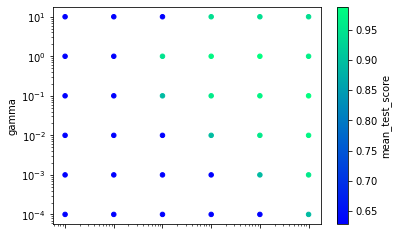

In [7]:
rbf10000 = rbf_res_df.xs(10000.0, level='max_iter').reset_index()
rbf10000.plot(kind='scatter', x='C', y='gamma', c='mean_test_score', cmap='winter', logx=True, logy=True)
rbf10000

In [8]:
rbf_validation_curve1 = rbf_res_df.xs((10000.0, 0.01), level=('max_iter', 'gamma'))
rbf_validation_curve2 = rbf_res_df.xs((10000.0, 0.1), level=('max_iter', 'gamma'))
rbf_validation_curve3 = rbf_res_df.xs((10000.0, 1), level=('max_iter', 'gamma'))

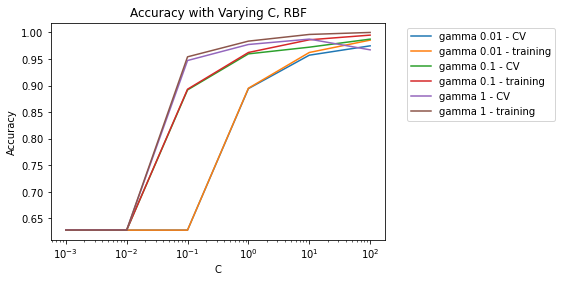

In [9]:
plt.plot(C, rbf_validation_curve1['mean_test_score'], label='gamma 0.01 - CV')
plt.plot(C, rbf_validation_curve1['mean_train_score'],  label='gamma 0.01 - training')
plt.plot(C, rbf_validation_curve2['mean_test_score'], label='gamma 0.1 - CV')
plt.plot(C, rbf_validation_curve2['mean_train_score'],  label='gamma 0.1 - training')
plt.plot(C, rbf_validation_curve3['mean_test_score'], label='gamma 1 - CV')
plt.plot(C, rbf_validation_curve3['mean_train_score'],  label='gamma 1 - training')
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.semilogx()
plt.title('Accuracy with Varying C, RBF')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.show()

In [10]:
poly = SVC(kernel='poly', random_state=1)
C = np.logspace(-3, 2, 6)
max_iter = np.logspace(1, 4, 4)
gamma = np.logspace(-4, 1, 6)
param_grid = dict(C=C, max_iter=max_iter, gamma=gamma)

poly_grid_search = GridSearchCV(
    estimator=rbf,
    param_grid=param_grid,
    return_train_score=True,
    cv=5,
    verbose=0,
)
poly_grid_result = poly_grid_search.fit(X_train_norm, y_train)
poly_res = poly_grid_result.cv_results_
poly_res_df = helpers.scikit_cv_result_to_df(poly_res)
poly_res_df.sort_values(by='rank_test_score')

/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxSca

mean_fit_time  std_fit_time  mean_score_time  \
C      gamma   max_iter                                                 
10.00  1.0000  100.0          0.001539      0.000113         0.000702   
               1000.0         0.002055      0.000678         0.000660   
               10000.0        0.001584      0.000138         0.000710   
100.00 0.1000  10000.0        0.001815      0.000264         0.000605   
               1000.0         0.001669      0.000169         0.000605   
...                                ...           ...              ...   
0.01   0.1000  1000.0         0.003715      0.000034         0.002023   
       0.0100  1000.0         0.003721      0.000063         0.002122   
       0.0010  10000.0        0.004761      0.000463         0.002795   
10.00  0.0001  10000.0        0.003618      0.000070         0.002053   
0.10   10.0000 10000.0        0.004057      0.000047         0.002189   

                         std_score_time  mean_test_score  std_test_score  \
C      gamma   max_iter                                                    
10.00  1.0000  100.0           0.000092         0.987437        0.011252   
               1000.0          0.000086         0.987437        0.011252   
               10000.0         0.000130         0.987437        0.011252   
100.00 0.1000  10000.0         0.000089         0.987437        0.011252   
               1000.0          0.000098         0.987437        0.011252   
...                                 ...              ...             ...   
0.01   0.1000  1000.0          0.000030         0.628165        0.003876   
       0.0100  1000.0          0.000178         0.628165        0.003876   
       0.0010  10000.0         0.000345         0.628165        0.003876   
10.00  0.0001  10000.0         0.000093         0.628165        0.003876   
0.10   10.0000 10000.0         0.000031         0.628165        0.003876   

                         rank_test_score  mean_train_score  std_train_score  
C      gamma   max_iter                                                      
10.00  1.0000  100.0                   1          0.995603         0.001537  
               1000.0                  1          0.996230         0.001260  
               10000.0                 1          0.996230         0.001260  
100.00 0.1000  10000.0                 1          0.994974         0.001540  
               1000.0                  1          0.994974         0.001540  
...                                  ...               ...              ...  
0.01   0.1000  1000.0                107          0.628142         0.000966  
       0.0100  1000.0                107          0.628142         0.000966  
       0.0010  10000.0               107          0.628142         0.000966  
10.00  0.0001  10000.0               107          0.628142         0.000966  
0.10   10.0000 10000.0               107          0.628142         0.000966  

[144 rows x 9 columns]

<AxesSubplot:xlabel='C', ylabel='gamma'>

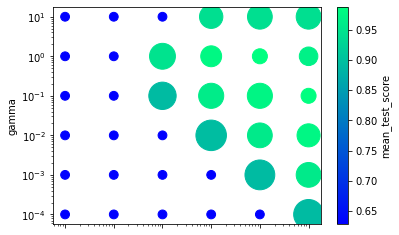

In [11]:
poly10000 = poly_res_df.xs(10000.0, level='max_iter').reset_index()
poly10000.plot(kind='scatter', x='C', y='gamma', c='mean_test_score', s=rbf10000['std_test_score']*20000, cmap='winter', logx=True, logy=True)

In [12]:
poly_validation_curve1 = poly_res_df.xs((10000.0, 0.01), level=('max_iter', 'gamma'))
poly_validation_curve2 = poly_res_df.xs((10000.0, 0.1), level=('max_iter', 'gamma'))
poly_validation_curve3 = poly_res_df.xs((10000.0, 1), level=('max_iter', 'gamma'))

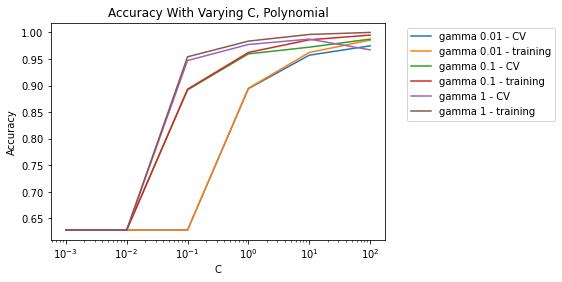

In [13]:
plt.plot(C, poly_validation_curve1['mean_test_score'], label='gamma 0.01 - CV')
plt.plot(C, poly_validation_curve1['mean_train_score'],  label='gamma 0.01 - training')
plt.plot(C, poly_validation_curve2['mean_test_score'], label='gamma 0.1 - CV')
plt.plot(C, poly_validation_curve2['mean_train_score'],  label='gamma 0.1 - training')
plt.plot(C, poly_validation_curve3['mean_test_score'], label='gamma 1 - CV')
plt.plot(C, poly_validation_curve3['mean_train_score'],  label='gamma 1 - training')
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.semilogx()
plt.title('Accuracy With Varying C, Polynomial')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.show()

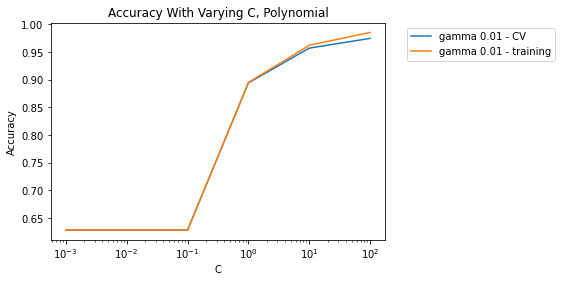

In [14]:
plt.plot(C, poly_validation_curve1['mean_test_score'], label='gamma 0.01 - CV')
plt.plot(C, poly_validation_curve1['mean_train_score'],  label='gamma 0.01 - training')
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.semilogx()
plt.title('Accuracy With Varying C, Polynomial')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.show()

In [46]:
poly_best = SVC(kernel='poly', C=.1, gamma=.01, max_iter=100, random_state=1)
poly_best.fit(X_train_norm, y_train)

/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=0.1, gamma=0.01, kernel='poly', max_iter=100, random_state=1)

In [47]:
y_test_pred = poly_best.predict(X_test_norm)
print(f"Final accuracy achieved: {accuracy_score(y_test, y_test_pred)}")

Final accuracy achieved: 0.8654970760233918


/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMa

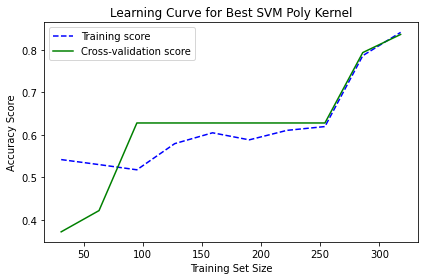

In [48]:
plot.plot_learning_curve(poly_best, X_train_norm, y_train, title='Learning Curve for Best SVM Poly Kernel')